In [7]:
import os
import sys

In [8]:
project_path = os.path.join(os.getcwd(), "../../")
project_path

'/data/ephemeral/home/upstageailab-cv-classification-cv_4/notebooks/lmw/../../'

In [9]:
import inspect
from tqdm import tqdm
from pathlib import Path

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from augraphy import *

In [10]:
pipeline = AugraphyPipeline(
    ink_phase=[
        InkBleed(),         # 잉크 번짐
        InkShifter(),       # 잉크 밀림
    ],
    paper_phase=[
        NoiseTexturize(),   # 배경 종이 질감
    ],
    post_phase=[
        Geometric(),        # 기울이기, 투시 왜곡
        DirtyDrum(),        # 인쇄 노이즈
        Jpeg(),             # 압축 노이즈
    ]
)

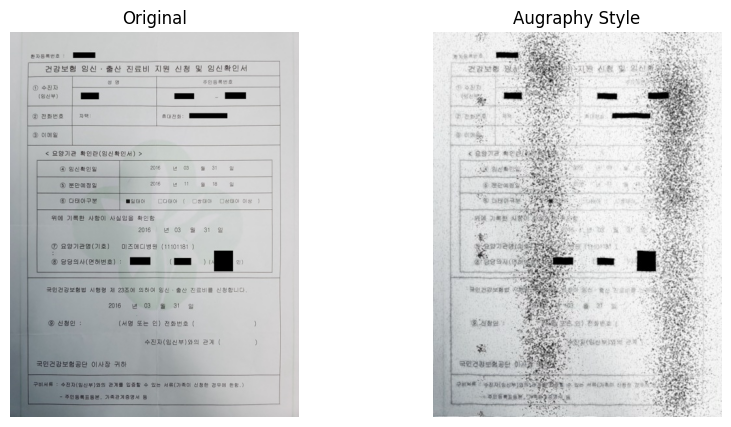

In [11]:
img = Image.open(os.path.join(project_path, "data/train/0a4adccbb7fe73e0.jpg"))
img_np = np.array(img)

# 파이프라인 정의
pipeline = AugraphyPipeline(
    ink_phase=[InkBleed(), InkShifter()],
    paper_phase=[NoiseTexturize()],
    post_phase=[Geometric(), DirtyDrum(), Jpeg()]
)

# 증강 실행
aug_img = pipeline(img_np)
aug_pil = Image.fromarray(aug_img)

# 시각화
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(aug_pil, cmap='gray'); plt.title("Augraphy Style"); plt.axis("off")
plt.show()

In [ ]:
from augraphy import *
import random

paper_phase = [
            OneOf(
        [
            DelaunayTessellation(
                n_points_range=(500, 800),
                n_horizontal_points_range=(500, 800),
                n_vertical_points_range=(500, 800),
                noise_type="random",
                color_list="default",
                color_list_alternate="default",
            ),
            PatternGenerator(
                imgx=random.randint(256, 512),
                imgy=random.randint(256, 512),
                n_rotation_range=(10, 15),
                color="random",
                alpha_range=(0.25, 0.5),
            ),
            VoronoiTessellation(
                mult_range=(50, 80),
                seed=19829813472,
                num_cells_range=(500, 1000),
                noise_type="random",
                background_value=(200, 255),
            ),
        ],
        p=1.0,
    ),
    AugmentationSequence(
        [
            NoiseTexturize(
                sigma_range=(3, 10),
                turbulence_range=(2, 5),
            ),
            BrightnessTexturize(
                texturize_range=(0.9, 0.99),
                deviation=0.03,
            ),
        ],
    ),
]

pipeline = AugraphyPipeline(paper_phase=paper_phase)

img = Image.open(os.path.join(project_path, "data/train/0a4adccbb7fe73e0.jpg"))
img_np = np.array(img)

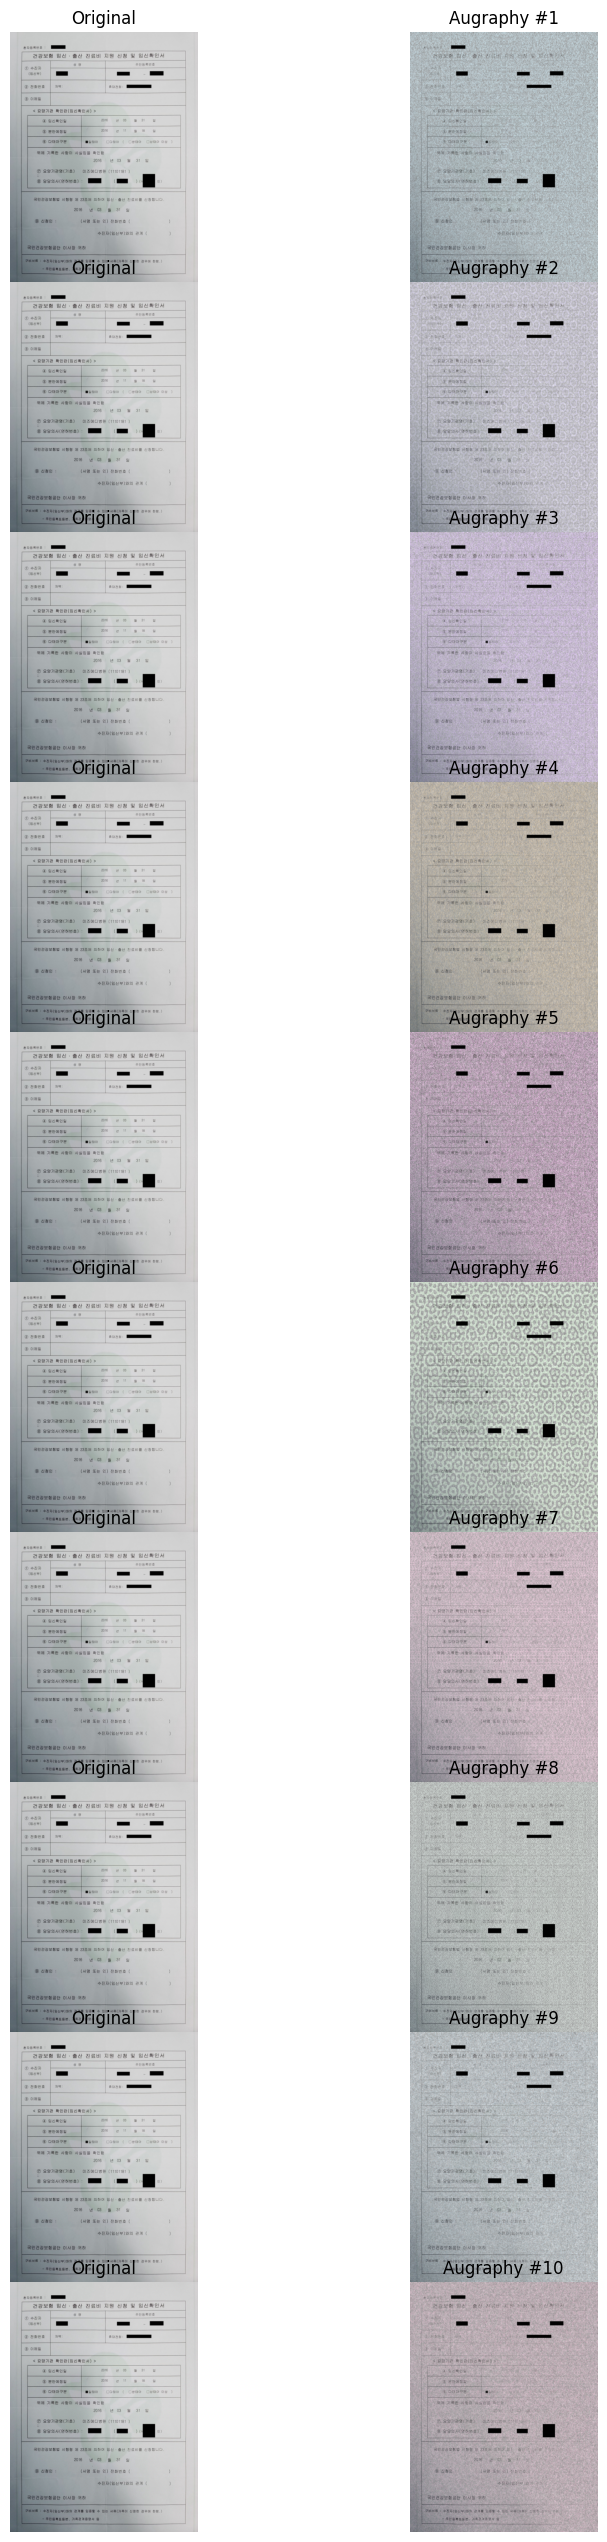

In [35]:
rows = 10
fig, axes = plt.subplots(rows, 2, figsize=(8, rows * 2.5))

for i in range(rows):
    # Augraphy 적용
    aug_np = pipeline(img_np)

    # 왼쪽: 원본
    axes[i, 0].imshow(img_np, cmap="gray")
    axes[i, 0].set_title(f"Original")
    axes[i, 0].axis("off")

    # 오른쪽: 증강본
    axes[i, 1].imshow(aug_np, cmap="gray")
    axes[i, 1].set_title(f"Augraphy #{i+1}")
    axes[i, 1].axis("off")

# 여백 제거
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, top=1, bottom=0)
plt.show()